In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
       print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animals10/translate.py
/kaggle/input/animals10/raw-img/cavallo/OIP-mdvOxIWAyReAoEJcMk5z4wHaJ4.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-TPYKs3XId_sMgp_6LLA6JgDMEy.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-jlVRrokx7Vu1axi8OnTX2AHaE2.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-F4QVZ71QagiynDMnFNxJUAHaEK.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-UFtUZnXq0JHZo5R8UuF80wHaFj.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-irWuWeIWd3Hm3BWGd0OEsQHaGO.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-Y-hB14A3coI7TEgrEew0UAHaFj.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-KqeKmYfnRwKd89nLg8_zRAHaHb.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-s40xdXSQY099gt1hLGlzAwHaFP.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-4k_sWoJ4_9-G1f0emDBVtwHaE6.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-W-uUxHx-yovp1DQNtX1qdQHaFk.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-Npxx8kemjjTljUyT9-BQgAHaFi.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-jCu7nlv

Loaded 2623 images from category: cavallo


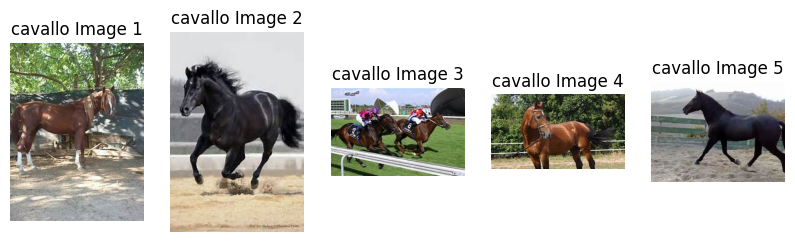

Loaded 1820 images from category: pecora


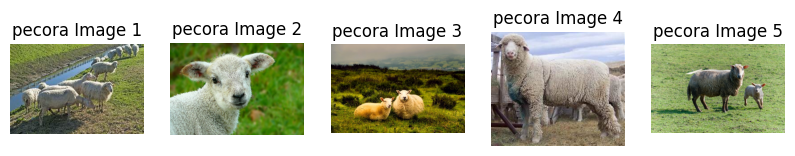

Loaded 1446 images from category: elefante


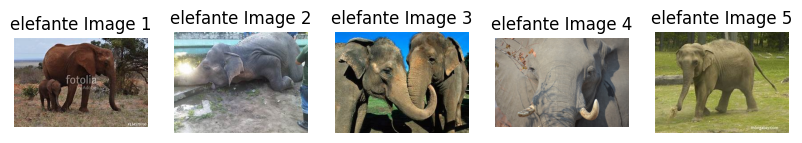

Loaded 1668 images from category: gatto


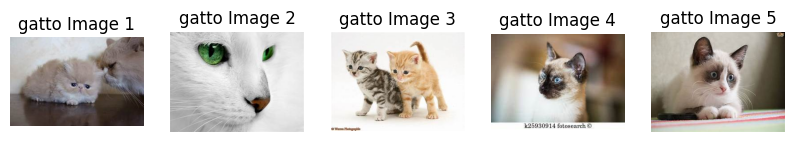

Loaded 1862 images from category: scoiattolo


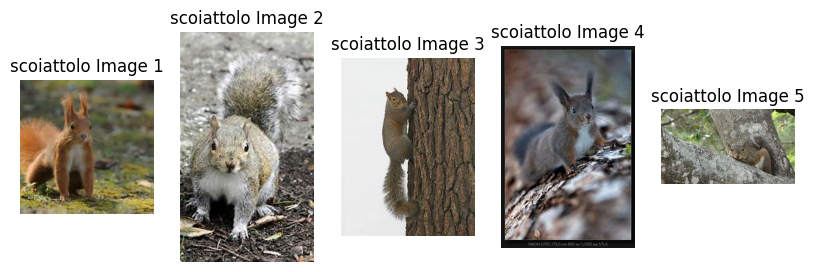

Loaded 3098 images from category: gallina


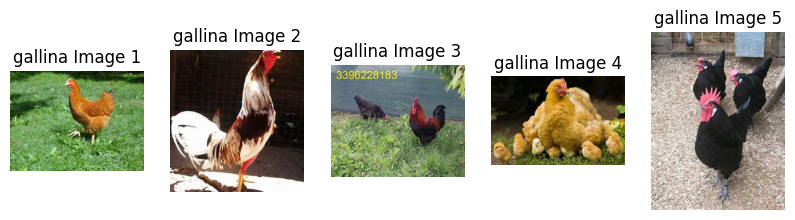

Loaded 4821 images from category: ragno


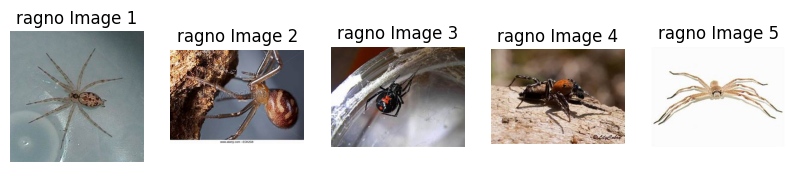

Loaded 1866 images from category: mucca


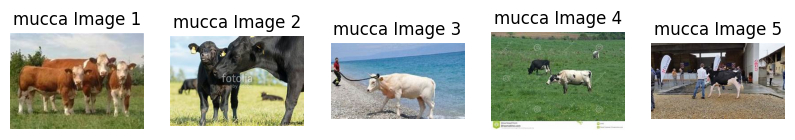

Loaded 4863 images from category: cane


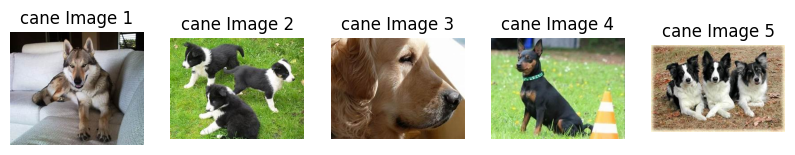

Loaded 2112 images from category: farfalla


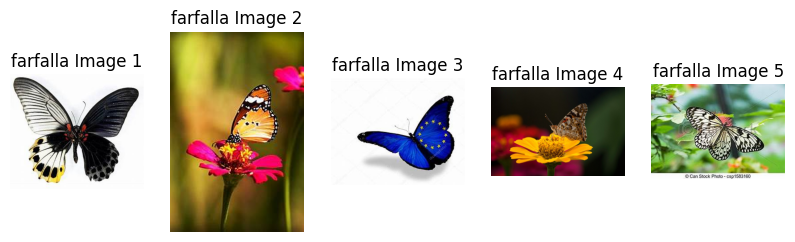

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt 

# Define the path to dataset
dataset_path = '/kaggle/input/animals10/raw-img'

# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path)
        images.append(img)
    return images

category_folders = os.listdir(dataset_path)
for category in category_folders:
    category_path = os.path.join(dataset_path, category)
    images = load_images_from_folder(category_path)
    # Now 'images' contains a list of PIL Image objects from the current category folder
    print(f"Loaded {len(images)} images from category: {category}")
    
    # Optionally,we can visualize the first few images
    plt.figure(figsize=(10, 5))
    for i in range(min(5, len(images))):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(f"{category} Image {i + 1}")
    plt.show()


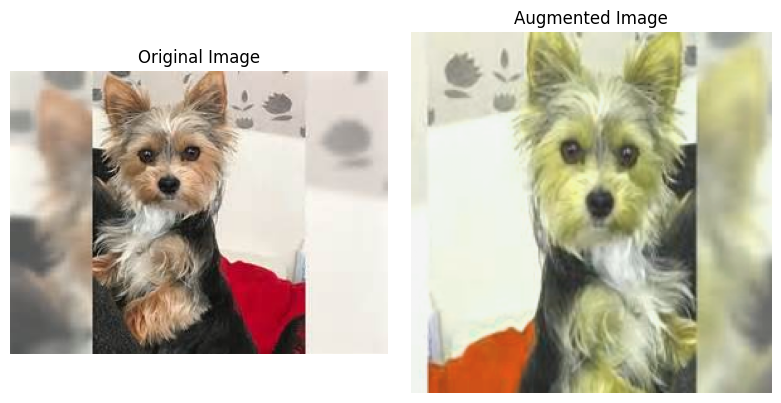

In [3]:
import os
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

# Define paths and parameters
dataset_path = '/kaggle/input/animals10/raw-img/'
output_path = '/kaggle/working/'

# Define transforms for data preprocessing and augmentation
# Resize and normalize
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # Converts PIL Image to tensor with values between 0 and 1
])

# Optional data augmentation
augmentation = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
])

# Function to apply augmentation
def apply_augmentation(image, transform):
    augmented_image = transform(image)
    return augmented_image

# Load dataset using ImageFolder
dataset = ImageFolder(root=dataset_path, transform=None)  # No transform applied initially

# Example of applying augmentation on a sample image
sample_idx = 0
original_image, _ = dataset[sample_idx]
augmented_image = apply_augmentation(original_image, augmentation)

# Convert augmented_image to tensor after augmentation
augmented_image_tensor = transforms.ToTensor()(augmented_image)

# Convert original_image to numpy array for visualization
if isinstance(original_image, torch.Tensor):
    original_image = original_image.permute(1, 2, 0).numpy()  # Convert tensor to numpy array and adjust dimensions
else:
    original_image = np.array(original_image)  # Convert PIL image to numpy array

# Visualize original and augmented image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(np.transpose(augmented_image_tensor.numpy(), (1, 2, 0)))
plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
import os
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms

# Define paths and parameters
dataset_path = '/kaggle/input/animals10/raw-img/'

# Define transforms for data preprocessing (resize and normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # Converts PIL Image to tensor with values between 0 and 1
])

# Load dataset using ImageFolder and apply transformations
dataset = ImageFolder(root=dataset_path, transform=transform)

# Example: Print class labels
print("Class Labels:", dataset.classes)

# Example: Print number of classes
num_classes = len(dataset.classes)
print("Number of Classes:", num_classes)

# Example: Print first few labels and paths
for idx in range(5):  # Print first 5 samples
    img_path, label = dataset.imgs[idx]
    print(f"Image Path: {img_path}, Label: {label}")

# Example: Use DataLoader for batching and shuffling (optional)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Example: Iterate through DataLoader batches
for batch in dataloader:
    images, labels = batch
    # Process batch of images and labels
    print(f"Batch size: {len(images)}, Label shape: {labels.shape}")
    break  # Break after first batch for demonstration


Class Labels: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Number of Classes: 10
Image Path: /kaggle/input/animals10/raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg, Label: 0
Image Path: /kaggle/input/animals10/raw-img/cane/OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg, Label: 0
Image Path: /kaggle/input/animals10/raw-img/cane/OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg, Label: 0
Image Path: /kaggle/input/animals10/raw-img/cane/OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg, Label: 0
Image Path: /kaggle/input/animals10/raw-img/cane/OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg, Label: 0
Batch size: 32, Label shape: torch.Size([32])


In [5]:
import os
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import transforms

# Define paths and parameters
dataset_path = '/kaggle/input/animals10/raw-img/'

# Define transforms for data preprocessing (resize and normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # Converts PIL Image to tensor with values between 0 and 1
])

# Load dataset using ImageFolder and apply transformations
dataset = ImageFolder(root=dataset_path, transform=transform)

# Define the sizes of training, validation, and test sets
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)  # 80% of data for training
val_size = int(0.1 * dataset_size)   # 10% of data for validation
test_size = dataset_size - train_size - val_size  # Rest for testing

# Use random_split to split dataset into training, validation, and test sets
train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

# Example: Print sizes of each set
print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_set)}")

# Example: Use DataLoader for batching and shuffling (optional)
batch_size = 32
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)  # No need to shuffle validation set
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)  # No need to shuffle test set

# Example: Iterate through DataLoader batches (optional)
for batch in train_loader:
    images, labels = batch
    # Process batch of training images and labels
    print(f"Batch size (Training): {len(images)}, Label shape: {labels.shape}")
    break  # Break after first batch for demonstration


Training set size: 20943
Validation set size: 2617
Test set size: 2619
Batch size (Training): 32, Label shape: torch.Size([32])


In [8]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18, ResNet18_Weights
from PIL import Image
import matplotlib.pyplot as plt

# Define paths and parameters
dataset_path = '/kaggle/input/animals10/raw-img/'
output_path = '/kaggle/working/'
num_classes = 10  # Number of classes in your dataset

# Define transforms for data preprocessing (resize and normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # Converts PIL Image to tensor with values between 0 and 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet normalization
])

# Load dataset using ImageFolder and apply transformations
dataset = ImageFolder(root=dataset_path, transform=transform)

# Define the sizes of training, validation, and test sets
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)  # 80% of data for training
val_size = int(0.1 * dataset_size)   # 10% of data for validation
test_size = dataset_size - train_size - val_size  # Rest for testing

# Use random_split to split dataset into training, validation, and test sets
train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

# Define DataLoader instances for training, validation, and test sets
batch_size = 32
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Define a simple CNN model (ResNet-18 as an example)
weights = ResNet18_Weights.DEFAULT  # Use the most up-to-date weights
model = resnet18(weights=weights)  # Load pretrained weights from ImageNet
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)  # Replace fully connected layer for your number of classes

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, preds = torch.max(outputs, 1)
    accuracy = torch.sum(preds == labels.data) / len(labels)
    return accuracy.item()

# Function for model training
def train_model(model, criterion, optimizer, num_epochs=10):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Training on {device}")

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward
            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Backward + optimize
                loss.backward()
                optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(torch.argmax(outputs, 1) == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(torch.argmax(outputs, 1) == labels.data)

        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    return model

# Train the model
trained_model = train_model(model, criterion, optimizer, num_epochs=10)

# Save the trained model
torch.save(trained_model.state_dict(), os.path.join(output_path, 'animal_classifier.pth'))

# Function to evaluate the model
def evaluate_model(model, test_loader, criterion):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()  # Set model to evaluation mode
    
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            test_corrects += torch.sum(torch.argmax(outputs, 1) == labels.data)

    test_loss = test_loss / len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Evaluate the trained model on the test set
evaluate_model(trained_model, test_loader, criterion)

# Function for making predictions on new images
def predict_image(model, image_path, class_names):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()  # Set model to evaluation mode

    # Image transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)  # Add batch dimension
    image = image.to(device)

    # Predict
    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)

    predicted_class = class_names[preds[0].item()]
    return predicted_class

# Test the prediction function
class_names = dataset.classes  # List of class names
sample_image_path = '/kaggle/input/animals10/raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg'  # Example image path

predicted_class = predict_image(trained_model, sample_image_path, class_names)
print(f'Predicted class: {predicted_class}')


Training on cuda:0
Epoch 1/10, Loss: 0.6404, Accuracy: 0.7941
Validation Loss: 0.5866, Validation Accuracy: 0.8200
Epoch 2/10, Loss: 0.3734, Accuracy: 0.8797
Validation Loss: 0.4560, Validation Accuracy: 0.8514
Epoch 3/10, Loss: 0.2629, Accuracy: 0.9166
Validation Loss: 0.3781, Validation Accuracy: 0.8861
Epoch 4/10, Loss: 0.2138, Accuracy: 0.9312
Validation Loss: 0.3979, Validation Accuracy: 0.8781
Epoch 5/10, Loss: 0.1700, Accuracy: 0.9437
Validation Loss: 0.4246, Validation Accuracy: 0.8701
Epoch 6/10, Loss: 0.1356, Accuracy: 0.9552
Validation Loss: 0.4238, Validation Accuracy: 0.8777
Epoch 7/10, Loss: 0.1066, Accuracy: 0.9649
Validation Loss: 0.6063, Validation Accuracy: 0.8353
Epoch 8/10, Loss: 0.1029, Accuracy: 0.9655
Validation Loss: 0.4759, Validation Accuracy: 0.8781
Epoch 9/10, Loss: 0.0993, Accuracy: 0.9671
Validation Loss: 0.4345, Validation Accuracy: 0.8865
Epoch 10/10, Loss: 0.0850, Accuracy: 0.9721
Validation Loss: 0.5205, Validation Accuracy: 0.8773
Test Loss: 0.4692, T

In [33]:
# Translation dictionary provided in the dataset
translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", 
    "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", 
    "ragno": "spider", "scoiattolo": "squirrel", "dog": "cane", "horse": "cavallo", 
    "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", 
    "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"
}
def predict_image(model, image_path, class_names, translate):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()  # Set model to evaluation mode

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension

    image = image.to(device)

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
        predicted_class = class_names[predicted.item()]
        translated_class = translate.get(predicted_class, predicted_class)  # Get the translated class
    
    return translated_class


In [35]:
from PIL import Image
import matplotlib.pyplot as plt

# Test the prediction function
class_names = dataset.classes  # List of class names
# Test the prediction function with translation
# Test the prediction function with translation
sample_image_path = "/kaggle/input/animals10/raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg"  # Change to an actual image path
predicted_class = predict_image(trained_model, sample_image_path, class_names, translate)
print(f'Predicted class: {predicted_class}')


Predicted class: dog


In [22]:
def evaluate_model(model, test_loader, criterion):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()  # Set model to evaluation mode
    
    test_loss = 0.0
    test_corrects = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            test_corrects += torch.sum(torch.argmax(outputs, 1) == labels.data)

    test_loss = test_loss / len(test_loader.dataset)
    test_acc = test_corrects.double() / len(test_loader.dataset)

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Evaluate the trained model on the test set
evaluate_model(trained_model, test_loader, criterion)


Test Loss: 0.4692, Test Accuracy: 0.8824


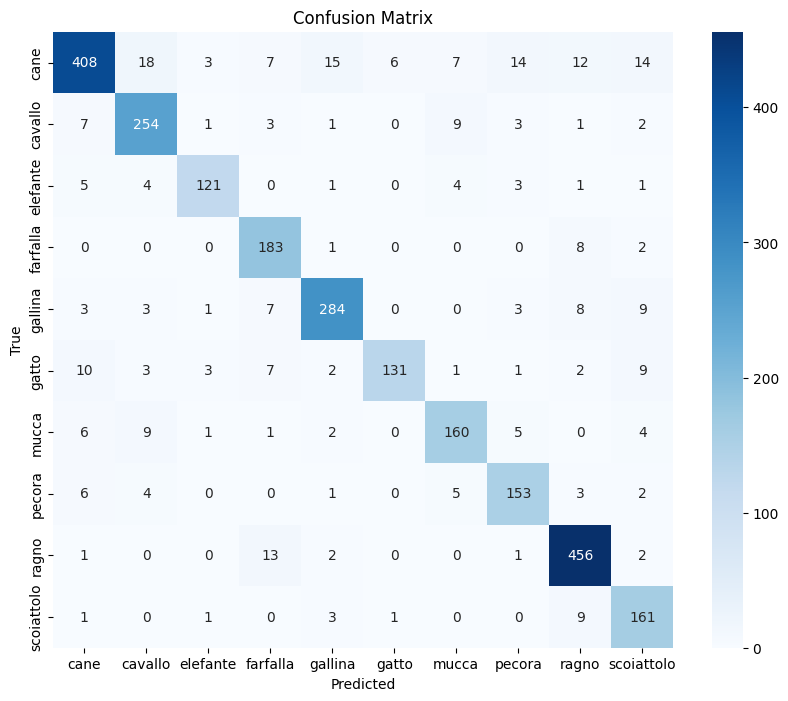

              precision    recall  f1-score   support

        cane       0.91      0.81      0.86       504
     cavallo       0.86      0.90      0.88       281
    elefante       0.92      0.86      0.89       140
    farfalla       0.83      0.94      0.88       194
     gallina       0.91      0.89      0.90       318
       gatto       0.95      0.78      0.85       169
       mucca       0.86      0.85      0.86       188
      pecora       0.84      0.88      0.86       174
       ragno       0.91      0.96      0.94       475
  scoiattolo       0.78      0.91      0.84       176

    accuracy                           0.88      2619
   macro avg       0.88      0.88      0.88      2619
weighted avg       0.89      0.88      0.88      2619



In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Function to evaluate the model and generate predictions for the test set
def get_predictions_and_labels(model, test_loader):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()  # Set model to evaluation mode
    
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_preds, all_labels

# Get predictions and true labels
preds, labels = get_predictions_and_labels(trained_model, test_loader)

# Generate confusion matrix
conf_matrix = confusion_matrix(labels, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(labels, preds, target_names=class_names))
